In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dl-course-data/ion.csv
/kaggle/input/dl-course-data/spotify.csv
/kaggle/input/dl-course-data/forestfires.csv
/kaggle/input/dl-course-data/songs.csv
/kaggle/input/dl-course-data/abalone.csv
/kaggle/input/dl-course-data/concrete.csv
/kaggle/input/dl-course-data/fuel.csv
/kaggle/input/dl-course-data/red-wine.csv
/kaggle/input/dl-course-data/hotel.csv
/kaggle/input/dl-course-data/diamonds.csv
/kaggle/input/dl-course-data/candy.csv
/kaggle/input/dl-course-data/cereal.csv
/kaggle/input/dl-course-data/housing.csv


(1119, 11)


2022-07-26 22:28:52.381509: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-26 22:28:52.825212: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
5/5 [==============================] - 2s 125ms/step - loss: 1.7418 - val_loss: 0.3709
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 1.2228 - val_loss: 0.2360
Epoch 3/100
5/5 [==============================] - 0s 63ms/step - loss: 1.0309 - val_loss: 0.1441
Epoch 4/100
5/5 [==============================] - 0s 65ms/step - loss: 1.0480 - val_loss: 0.1346
Epoch 5/100
5/5 [==============================] - 0s 64ms/step - loss: 0.9752 - val_loss: 0.1358
Epoch 6/100
5/5 [==============================] - 0s 64ms/step - loss: 0.9079 - val_loss: 0.1387
Epoch 7/100
5/5 [==============================] - 0s 65ms/step - loss: 0.8510 - val_loss: 0.1358
Epoch 8/100
5/5 [==============================] - 0s 64ms/step - loss: 0.7736 - val_loss: 0.1426
Epoch 9/100
5/5 [==============================] - 0s 63ms/step - loss: 0.7462 - val_loss: 0.1460
Epoch 10/100
5/5 [==============================] - 0s 66ms/step - loss: 0.6813 - val_loss: 0.1491
Epoch 11/100
5/5 [

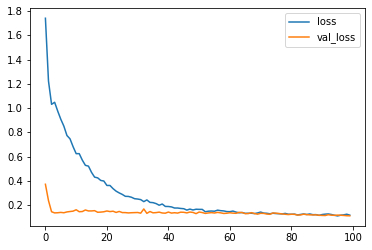

In [2]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True,
)


red_wine = pd.read_csv('../input/dl-course-data/red-wine.csv')
# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
df_train.head(4)

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

print(X_train.shape)

# Create a network with # linear unit
model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model.compile(
    optimizer="adam",
    loss="mae",
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=1,  # turn on training log
)

# Show the learning curves
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

